In [2]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

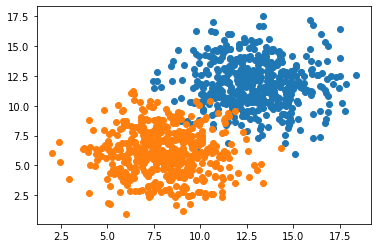

In [3]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [6]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs=500, shuffle='true')



Epoch 1/500
20/20 [==============================] - 0s 1ms/step - loss: 5.2635 - accuracy: 0.5074
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 0.9082 - accuracy: 0.5736
Epoch 3/500
20/20 [==============================] - 0s 959us/step - loss: 0.6229 - accuracy: 0.6595
Epoch 4/500
20/20 [==============================] - 0s 906us/step - loss: 0.5245 - accuracy: 0.7387
Epoch 5/500
20/20 [==============================] - 0s 927us/step - loss: 0.4710 - accuracy: 0.7905
Epoch 6/500
20/20 [==============================] - 0s 893us/step - loss: 0.4134 - accuracy: 0.8626
Epoch 7/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3651 - accuracy: 0.8974
Epoch 8/500
20/20 [==============================] - 0s 914us/step - loss: 0.3334 - accuracy: 0.8964
Epoch 9/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2871 - accuracy: 0.9431
Epoch 10/500
20/20 [==============================] - 0s 912us/step - loss: 0.2741 - accuracy: 0.93

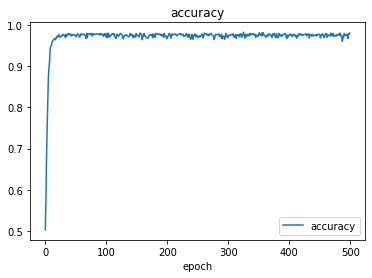

In [7]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

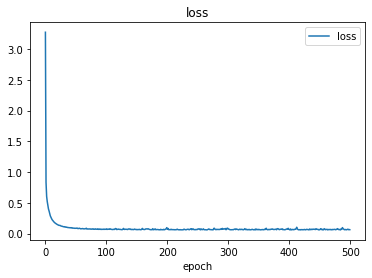

In [8]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [44]:
def plot_decision_boundary(X, y, model):
  x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
  y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_,yy_]
  pred_func = model.predict(grid)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

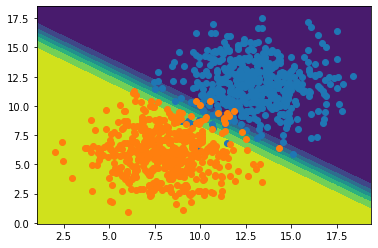

In [46]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Prediction is: [[0.99999166]]


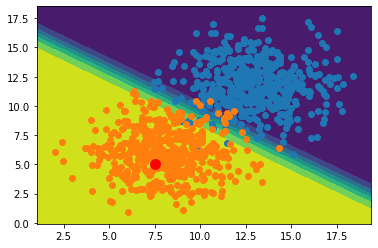

In [52]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker="o", markersize=10, color="red")
print("Prediction is:", prediction)